<a href="https://colab.research.google.com/github/Harshita2406AI/Image_Recognition_ML/blob/main/Image_Recognition_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshitapadhi","key":"9fdee784754dc48d53f8019157ccaf4c"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train. shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print (f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


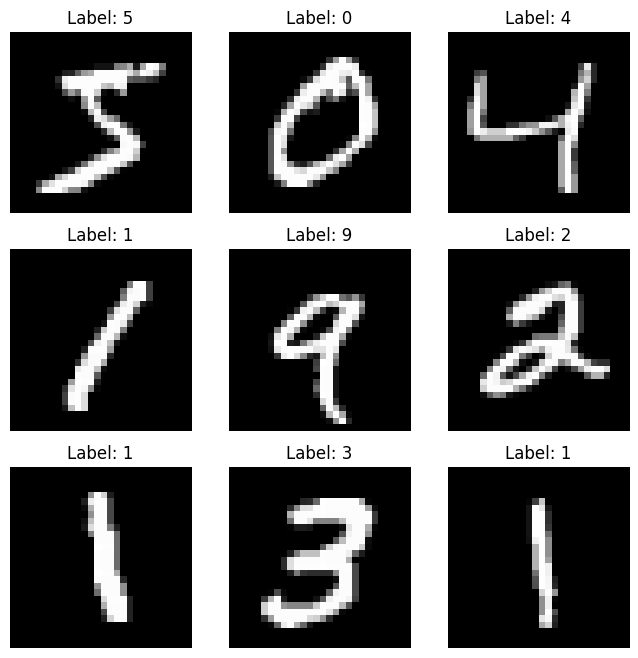

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(10,activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 32, validation_split = 0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9046 - loss: 0.3113 - val_accuracy: 0.9796 - val_loss: 0.0680
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9853 - loss: 0.0466 - val_accuracy: 0.9873 - val_loss: 0.0432
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9903 - loss: 0.0298 - val_accuracy: 0.9877 - val_loss: 0.0404
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9887 - val_loss: 0.0436
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9945 - loss: 0.0156 - val_accuracy: 0.9885 - val_loss: 0.0404


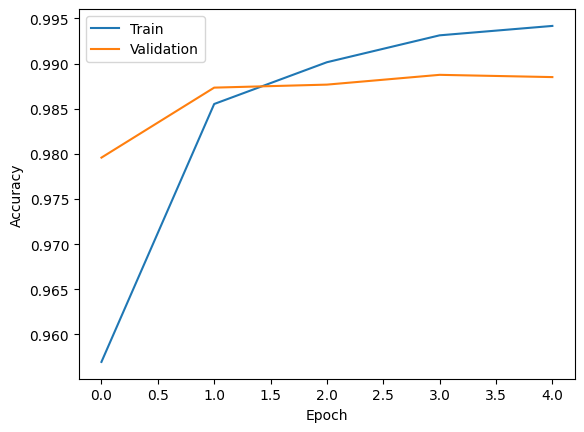

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'],
         label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test Accuracy {test_acc:.4f}")
y_pred = model.predict(x_test).argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9865 - loss: 0.0457
Test Accuracy {test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(10,activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)


In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D (2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D (128, (3,3), activation='relu'),
    MaxPooling2D (2,2),
    Flatten(),
    Dense (256, activation='relu'),
    Dropout (0.5),
    Dense (10, activation='softmax')
])
model.compile(optimizer = 'adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen. flow (x_train_c10,y_train_c10, batch_size=32), epochs=10, validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 75ms/step - accuracy: 0.3452 - loss: 1.7761 - val_accuracy: 0.5339 - val_loss: 1.3157
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5318 - loss: 1.3231 - val_accuracy: 0.5774 - val_loss: 1.1832
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5870 - loss: 1.1779 - val_accuracy: 0.6135 - val_loss: 1.1134
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6213 - loss: 1.0951 - val_accuracy: 0.6357 - val_loss: 1.0460
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.6391 - loss: 1.0409 - val_accuracy: 0.4394 - val_loss: 1.7512
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6551 - loss: 0.9993 - val_accuracy: 0.5218 - val_loss: 1.6191
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.6626 - loss: 0.9745 - val_accuracy: 0.6674 - val_loss: 0.9819
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 73ms/step - accuracy: 0.6752 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

           0       0.69      0.79      0.73      1000
           1       0.86      0.84      0.85      1000
           2       0.74      0.44      0.55      1000
           3       0.66      0.35      0.46      1000
           4       0.63      0.67      0.65      1000
           5       0.79      0.41      0.54      1000
           6       0.56      0.89      0.69      1000
           7       0.66      0.79      0.72      1000
           8       0.80      0.84      0.82      1000
           9       0.69      0.91      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.68     10000
weighted avg       0.71      0.69      0.68     10000



<function matplotlib.pyplot.show(close=None, block=None)>

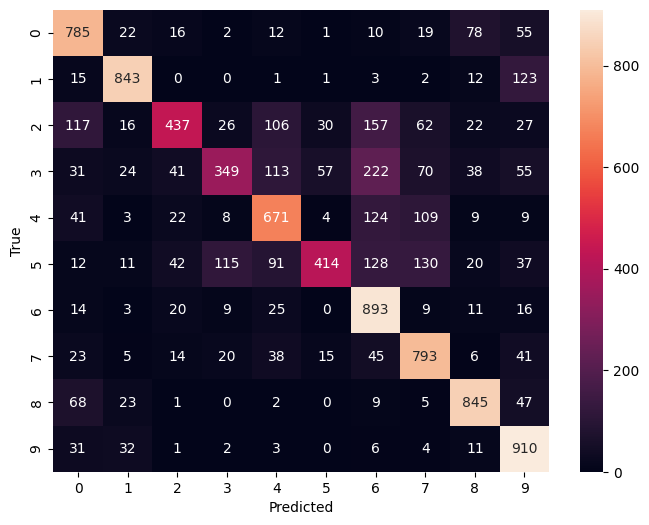

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10=model.predict(x_test_c10). argmax (axis=1)
cm=confusion_matrix (y_test_c10,y_pred_c10)
print(classification_report (y_test_c10, y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 89% 195M/218M [00:00<00:00, 318MB/s]  
100% 218M/218M [00:00<00:00, 301MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset= 'training'
)

val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats', target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset= 'validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model = Sequential ([base_model, GlobalAveragePooling2D(), Dense(128, activation = 'relu'), Dense(1,activation = 'sigmoid')])
model.compile(optimizer =  'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.7805 - loss: 0.5422 - val_accuracy: 0.7985 - val_loss: 0.5108
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.7996 - loss: 0.4964 - val_accuracy: 0.7985 - val_loss: 0.5176
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.8001 - loss: 0.4862 - val_accuracy: 0.7985 - val_loss: 0.5211
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.7981 - loss: 0.4776 - val_accuracy: 0.7985 - val_loss: 0.5154
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.7997 - loss: 0.4609 - val_accuracy: 0.7975 - val_loss: 0.5251


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam (1e-5),
              loss='binary_crossentropy', metrics=['accuracy']
)
model.fit(train_generator, epochs = 3, validation_data = val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1590s 6s/step - accuracy: 0.8013 - loss: 0.4775 - val_accuracy: 0.7975 - val_loss: 0.5256
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1547s 6s/step - accuracy: 0.8004 - loss: 0.4468 - val_accuracy: 0.7980 - val_loss: 0.5282
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1524s 6s/step - accuracy: 0.8028 - loss: 0.4257 - val_accuracy: 0.7985 - val_loss: 0.5284


In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')


63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step


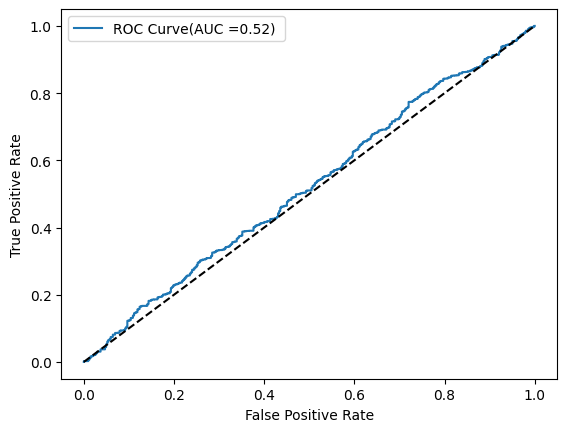

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr,_=roc_curve (val_generator.classes, y_pred_proba)
roc_auc = auc (fpr,tpr)
plt.plot(fpr, tpr, label = f'ROC Curve(AUC ={roc_auc:.2f}) ')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:

from google.colab import files
uploaded = files.upload() # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'cat.4001.jpg' # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims (img_array, axis=0)
img_array = preprocess_input(img_array)

prediction =  loaded_model.predict(img_array)
print("Predicted class:", "Cat" if prediction[0][0] > 0.5 else "Dog")

Saving cat.4001.jpg to cat.4001 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted class: Cat


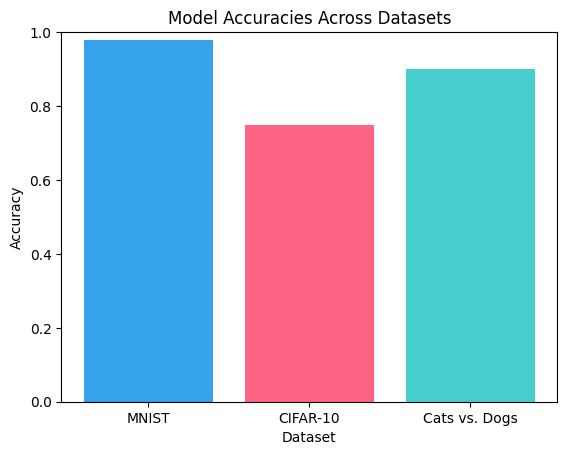

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies  = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#48CeCe'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()